# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries to build a machine learning model capable of predicting whether or not someone has heart disease.

## 1. Problem definition
 > Given clinical parameters about a patient, can we predict whether or not they has heart disease ?

## 2.Data

 if you want to know about our dataset, you can [see here](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) to have more information.


Attribute:
Only 14 attributes used:
* age: age in years

* sex: sex (1 = male; 0 = female)

* cp: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic

* trestbps: resting blood pressure (in mm Hg on admission to the hospital)

* chol: serum cholestoral in mg/dl

* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


* thalach: maximum heart rate achieved

* exang: exercise induced angina (1 = yes; 0 = no)

* oldpeak = ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping

* ca: number of major vessels (0-3) colored by flourosopy

* thal: 
    * 3 = normal
    * 6 = fixed defect
    * 7 = reversable defect



## 3. Evaluation condition
> If we can reach more than 0.90 accuracy at predicting, we can continue, we will pursue the project. 



## 4. Features

this is where we will get all information about out dataset.

In [1]:

# EDA(exploratory data analisis) and plotting libraties
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv('heart-disease.csv')
print(df.shape)




(303, 14)


### EDA (Exploratory data analysis)
The goal here is to find out more about the data and become a subject matter export on the dataset.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?


In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

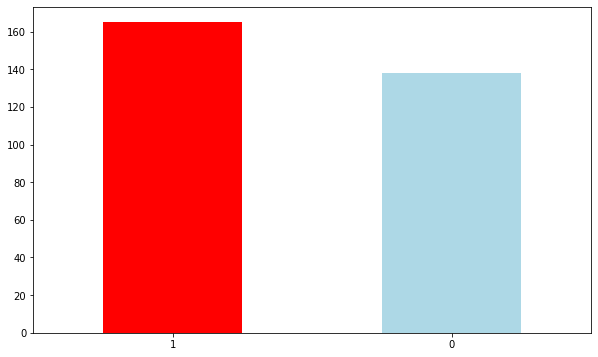

In [3]:
plt.figure(figsize=(10,6))
df.target.value_counts().plot(kind='bar', color=['red', 'lightblue'])
plt.xticks(rotation=0)



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart frequency according to Sex


<Figure size 720x432 with 0 Axes>

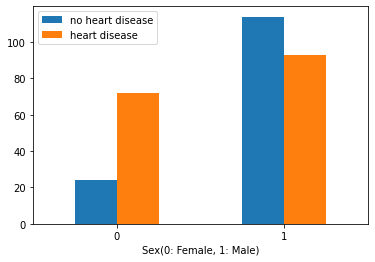

In [7]:
df.sex.value_counts()
plt.figure(figsize=(10,6))
pd.crosstab(df.sex, df.target).plot(kind='bar')
plt.legend(['no heart disease', 'heart disease'])
plt.xlabel('Sex(0: Female, 1: Male)')
plt.xticks(rotation=0)
plt.show()

### Heart disease in function of age


<AxesSubplot:xlabel='age', ylabel='Count'>

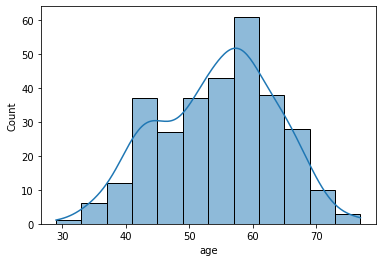

In [8]:
sns.histplot(data=df.age, kde=True)
# nomarle distribution

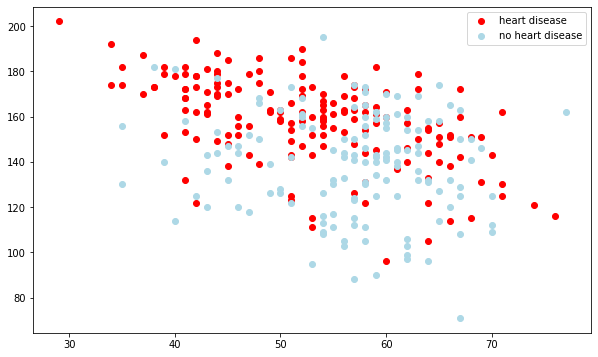

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1], df.thalach[df.target==1], c='red')
plt.scatter(df.age[df.target == 0], df.thalach[df.target==0], c='lightblue')
plt.legend(['heart disease', 'no heart disease'])
plt.show()


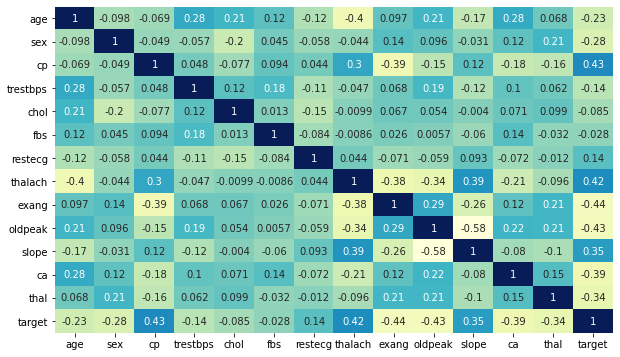

In [10]:
# Correlation matrix
plt.figure(figsize=(10,6))

sns.heatmap(data=df.corr(), cbar=None, 
cmap='YlGnBu',annot=True)

plt.show()


## 5.Modeling

We will use KNeighborsClassifier, RandomForestClassifier and LogisticRegression models in Scikit-Learn to train out data. 

In [43]:

# Scikit-learn model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score


In [12]:
# Prepare Train, Test sets
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Model Comparision


<Figure size 720x432 with 0 Axes>

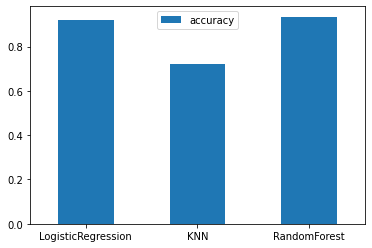

In [13]:

models = {
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier()
}

def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    Fit and evaluates given machine learning models.
    models: a dictionary of different scikit learn machine learning models.
    X_train: training data(features)
    X_test: testing data(features)
    y_train: training label
    y_test: testing label
    """
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)

        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores = pd.DataFrame(model_scores, index=['accuracy'])
plt.figure(figsize=(10,6))
model_scores.T.plot.bar()
plt.xticks(rotation=0)
plt.show()

In [14]:
### Models turning by GridSearchCV
log_grid = {
    'C': np.logspace(-4,4,30),
    'solver': ['liblinear']

}

gs_log_reg = GridSearchCV(LogisticRegression(random_state=0),                            param_grid=log_grid, 
                          cv= 5, 
                        verbose=True)

gs_log_reg.fit(X_train, y_train)                    

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [22]:
#Check the best hyperparameters
gs_log_reg.best_params_


LogisticRegression(C=0.20433597178569418, random_state=0, solver='liblinear')

In [16]:
# Evaluate the grid search LogisticRegression
gs_log_reg.score(X_test, y_test)

0.9180327868852459

In [17]:
rd_grid = {
    "n_estimators": [100,150,200,250,300, 400, 500, 700, 1000],
    "min_samples_split": np.arange(2,10,1)
}

In [18]:
rd_reg =  GridSearchCV(RandomForestClassifier(random_state=0), param_grid= rd_grid, cv=5, verbose=True)


In [19]:
rd_reg.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 150, 200, 250, 300, 400, 500,
                                          700, 1000]},
             verbose=True)

In [20]:
rd_reg.score(X_test, y_test)

0.9016393442622951

## 5. Evaluation

In [24]:
# Re-create model
lg_reg = gs_log_reg.best_estimator_
lg_reg.fit(X_train, y_train)
lg_reg.score(X_test, y_test)

# Evaluation model
y_preds = lg_reg.predict(X_test)


### Confusion matric

[[24  5]
 [ 0 32]]


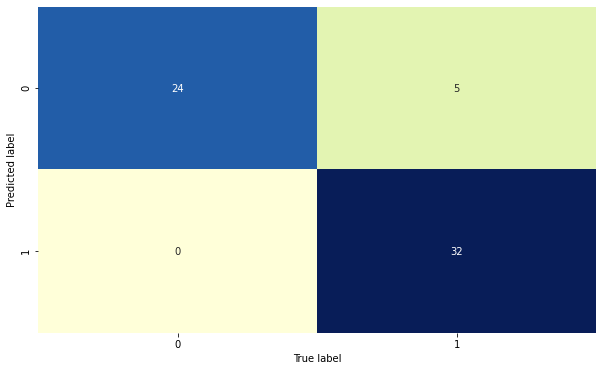

In [41]:

# Confusion Matric
print(confusion_matrix(y_test, y_preds))
def plot_conf_mat(y_test, y_pred):
    """
    Plot confusion matric using sns
    """
    fig, ax = plt.subplots(figsize=(10,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=None, cmap="YlGnBu")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.show()
plot_conf_mat(y_test, y_preds)


### Classification report

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        29
           1       0.86      1.00      0.93        32

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.92        61
weighted avg       0.93      0.92      0.92        61



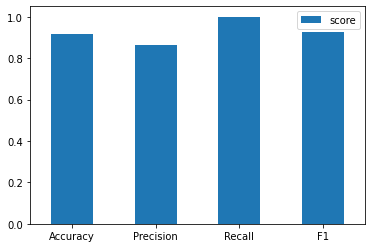

In [48]:
cv_metric = pd.DataFrame({
    "Accuracy": lg_reg.score(X_test, y_test),
    "Precision": precision_score(y_test, y_preds),
    "Recall": recall_score(y_test, y_preds),
    "F1": f1_score(y_test, y_preds)
}, index=['score'])

cv_metric.T.plot.bar()
plt.xticks(rotation=0)
plt.show()

### Feature Importance
Feature importance is another as asking "which features contributed most to the outcomes of our model and how did they contribute?"

Finding features importance is difference for each machine learning model


<AxesSubplot:title={'center':'Feature importance'}>

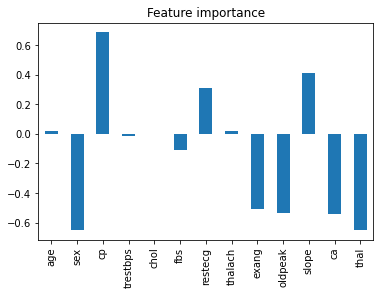

In [56]:
# Check coef's of feature to columns
feature_dict = dict(zip(df.columns, list(lg_reg.coef_[0])))

#cp and thal
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False)